# MOVIE RECOMMENDATIONS SYSTEMS

## BUSINESS UNDERSTANDING

### Project Overview
The primary objective of this project is to develop a movie recommendation system that provides users with a list of the top 5 movie recommendations based on their previous ratings. By analyzing user preferences and movie ratings, the model will suggest movies that a user is likely to enjoy, helping them discover new content based on their viewing history therefore addressing the problem of content overload users face on streaming platforms.

### Business Problem
In the current entertainment industry where users are overwhelmed by the overabundance volume of available content,users often feel overwhelmed by the number of movie choices. Providing personalized movie recommendations is critical to ensuring users stay engaged and reduce time spent searching for the content. A well designed recommendation system helps solve this problem by analyzing user behavior and movie preferences, ultimately improving user satisfaction, increasing engagement with the platform and optimizing content discovery. This project aims to create a recommendation system to recommend movies to users in a personalized manner based on their previous viewing and rating history. Generally, the recommendation system should answer the following:
- How can top 5 movie recommendations be generated for each user based on their past ratings?
- How can recommendations be improved for new users or new movies with limited rating data?

By implementing a recommendation system using collaborative filtering, *the project aims to learn from user interactions with movies (ratings) and predict preferences*. To further address situations where there is not enough rating data (the cold start problem), a hybrid approach incorporating content-based filtering will be explored. Finally, evaluation metrics such as RMSE and MAE will be used to gauge the accuracy of the predictions.


### Stakeholders
- **Online Movie Streaming Platforms**:(e.g., Netflix, Amazon Prime) looking to enhance their user experience by providing personalized movie recommendations to retain users and increase viewing time.
  
- **Movie Rating Websites**:(e.g., IMDb, Rotten Tomatoes) aiming to suggest relevant movies to users based on their previous ratings to drive engagement and reviews.

## DATA UNDERSTANDING

### Data Overview
The MovieLens dataset provided by GroupLens is used for this recommendation system project. It contains over 100,000 movie ratings from 943 users and 1,682 movies. The data spans several decades, capturing diverse user tastes and preferences.

### Data Sources and Collection
- Sources include:
1. **MovieLens Website**: The dataset is sourced from the MovieLens website, a movie recommendation service by GroupLens Research at the       University of Minnesota.
2. **User Ratings**: It includes user-generated ratings for movies, reflecting user preferences and opinions.
3. **Movie Information**: The dataset provides information about movies, including titles, genres, and additional metadata.

- Data Collection Process:
1. **User Registration**: Users register on the MovieLens website to rate movies and provide feedback.
2. **Rating Process**: Users rate movies on a scale (commonly 1 to 5 stars), and this data is collected for the recommendation system.
3. **Data Aggregation**: GroupLens Research aggregates the ratings and movie information into publicly available datasets.

### Data Description
The MovieLens dataset is consists of four separate files:

#### 1. **Ratings Data (`ratings.csv`)**

- This dataset contains the primary information used to build the recommendation system with 100,000 rows and 4 columns Each row represents a user's rating for a specific movie, where:
  - `userId`: Unique identifier for each user.
  - `movieId`: Unique identifier for each movie.
  - `rating`: User’s rating of the movie on a scale from 0.5 to 5.0 (in increments of 0.5).
  - `timestamp`: The time when the rating was provided.
  

#### 2. **Movies Data (`movies.csv`)**
- This dataset provides details on movies with 1,682 rows and 3 columns:
  - `movieId`: Unique identifier for each movie (matches the `movieId` in ratings).
  - `title`: Name of the movie.
  - `genres`: Movie genres (a movie can belong to multiple genres).

#### 3. **Tags Data (`tags.csv`)**
- This dataset contains user-defined tags applied to movies with 1,000 rows and 3 columns. Each row provides:
  - `userId`: Identifier for the user who tagged the movie.
  - `movieId`: Identifier for the movie tagged (corresponds to the `movieId` in the ratings and movies datasets).
  - `tag`: User-generated tag for the movie (e.g., "funny", "action-packed", "classic").
  - `timestamp`: The time when the tag was provided.
- Tags can provide additional insights into user perceptions, useful for hybrid or content-based recommendation systems.

#### 4. **Links Data (`links.csv`)**
- This dataset links movies to external sources with 1,000 rows and 4 columns:
  - `movieId`: Unique identifier for each movie (matches `movieId` in ratings and movies datasets).
  - `imdbId`: Identifier for the movie in the Internet Movie Database (IMDb).
  - `tmdbId`: Identifier for the movie in The Movie Database (TMDb).
- While not directly used in the recommendation system, this data can extend the system by connecting it to external movie databases for additional information.


### Data Exploration

In [24]:
# Import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the datasets

ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

#### Data Overview

In [25]:

# Display the first five rows of the datasets

print("Ratings Data Overview:")
print(ratings.head(), "\n")

print("Movies Data Overview:")
print(movies.head(), "\n")

print("Tags Data Overview:")
print(tags.head(), "\n")

print("Links Data Overview:")
print(links.head(), "\n")

Ratings Data Overview:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931 

Movies Data Overview:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Tags Data Overview:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2   

In [26]:
# Display the last five rows of the datasets

print("Ratings Data Overview:")
print(ratings.tail(), "\n")

print("Movies Data Overview:")
print(movies.tail(), "\n")

print("Tags Data Overview:")
print(tags.tail(), "\n")

print("Links Data Overview:")
print(links.tail(), "\n")

Ratings Data Overview:
        userId  movieId  rating   timestamp
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415 

Movies Data Overview:
      movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
9737  Action|Animation|Comedy|Fantasy  
9738         Animation|Comedy|Fantasy  
9739                            Drama  
9740                 Action|Animation  
9741                           Comedy   

Tags Data Overview:
      userId  movieId               tag   timestamp
3678     606  

In [27]:
# Check the shape and info of each dataset
# Ratings Data
print("Ratings Data:")
print(ratings.shape)
print(ratings.info())

# Movies Data
print("\nMovies Data:")
print(movies.shape)
print(movies.info())

# Tags Data
print("\nTags Data:")
print(tags.shape)
print(tags.info())

# Links Data
print("\nLinks Data:")
print(links.shape)
print(links.info())


Ratings Data:
(100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Movies Data:
(9742, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Tags Data:
(3683, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------

In [28]:
# Descriptive Statistics

print("\nDescriptive Statistics:")
print("Ratings:\n", ratings.describe())
print("\nMovies:\n", movies.describe())
print("\nTags:\n", tags.describe()) 
print("\nLinks:\n", links.describe())  



Descriptive Statistics:
Ratings:
               userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

Movies:
              movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Tags:
             userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.55

In [29]:
# Unique counts
# Check the unique counts for key columns in each dataset.

print("\nUnique Counts in Ratings Data:")
print(ratings['userId'].nunique(), "unique users")
print(ratings['movieId'].nunique(), "unique movies")

print("\nUnique Counts in Movies Data:")
print(movies['movieId'].nunique(), "unique movies")
print(movies['genres'].nunique(), "unique genres")

print("\nUnique Counts in Tags Data:")
print(tags['userId'].nunique(), "unique users")
print(tags['movieId'].nunique(), "unique movies")
print(tags['tag'].nunique(), "unique tags")

print("\nUnique Counts in Links Data:")
print(links['movieId'].nunique(), "unique movies")



Unique Counts in Ratings Data:
610 unique users
9724 unique movies

Unique Counts in Movies Data:
9742 unique movies
951 unique genres

Unique Counts in Tags Data:
58 unique users
1572 unique movies
1589 unique tags

Unique Counts in Links Data:
9742 unique movies


#### Data Distribution

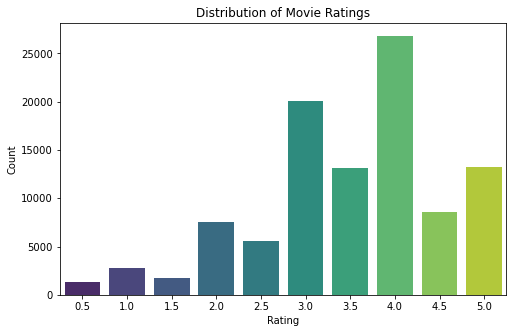

In [30]:
# Distribution of Ratings

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

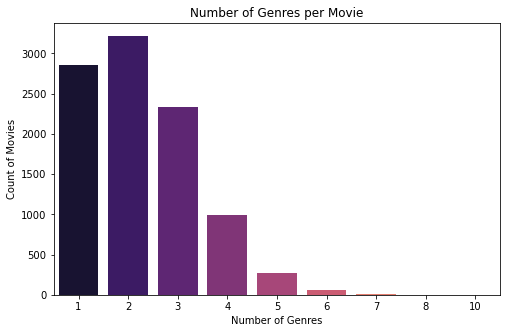

In [31]:
# Distribution of Movies by Genres

movies['genre_count'] = movies['genres'].apply(lambda x: len(x.split('|')))
plt.figure(figsize=(8, 5))
sns.countplot(x='genre_count', data=movies, palette='magma')
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Count of Movies')
plt.show()

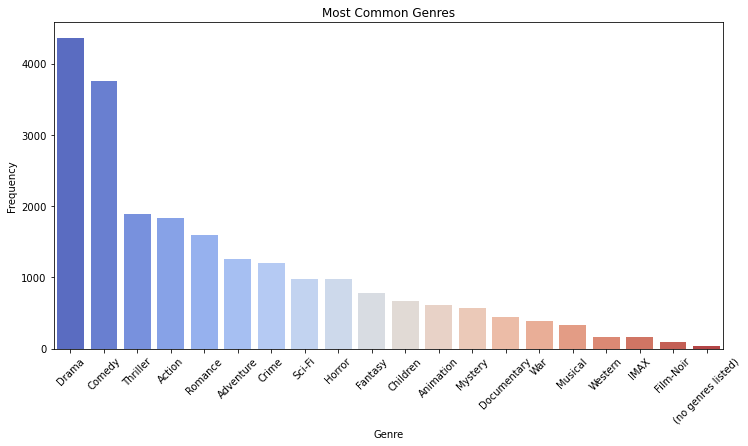

In [32]:
# Display the most common genres

genre_list = '|'.join(movies['genres'].tolist()).split('|')
genre_count = pd.Series(genre_list).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='coolwarm')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


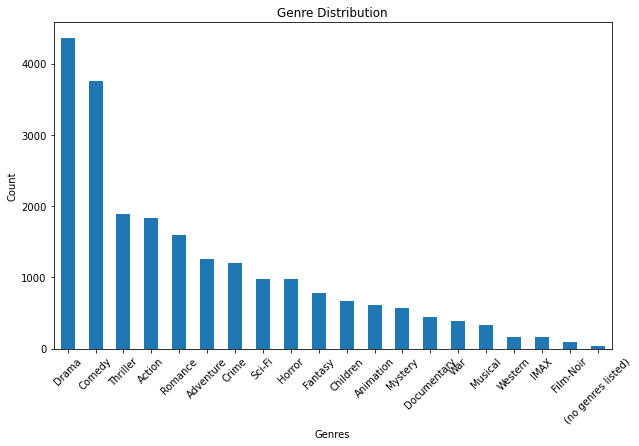

In [33]:
# Genre Analysis - Analyze the genre distribution in the movies dataset.

# Count of each genre
genre_counts = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


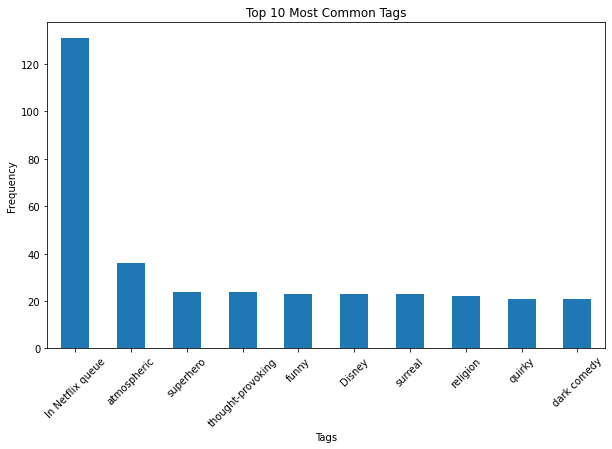

In [34]:
#### Tag Frequency - Check the most common tags in the tags dataset

# Most common tags
tag_counts = tags['tag'].value_counts().head(10)

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
